# Classification model evaluation: F1 and ROC
### Use 'Book club.csv'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Divide the data into 75% training and 25% test data (use random_state=100) and run the following logit model on training data. Report the coefficients.
- **(M1) Buy = β0 + β1 Male + β2 Buyamt + β3 Freq + β4 Lastbuy + β5 Firstbuy + β6 Child + β7 Youth + β8 Cook + β9 DIY + β10 Art + e**

In [2]:
# Read data

df = pd.read_csv('Book club.csv')
df.head()

,id,buy,male,buyamt,freq,lastbuy,firstbuy,child,youth,cook,diy,art
0,1,0,1,123,12,1,12,0,1,0,0,0
1,2,0,1,294,6,2,8,0,1,1,0,0
2,3,0,1,138,14,9,38,1,1,3,2,1
3,4,0,1,228,2,1,2,0,1,0,0,0
4,5,0,1,102,22,2,24,2,0,0,0,0


- `pd.read_csv()`: Function is used to read data from a CSV file and create a DataFrame from it.

In [3]:
# Define y, x

y=df.buy
x=df[['male', 'buyamt', 'freq', 'lastbuy', 'firstbuy', 'child', 'youth', 'cook', 'diy', 'art']]
# x=df.iloc[:, 2:]  # alternative

- `y = df.buy`: Extracts the 'buy' column from the DataFrame df and assigns it to the variable y.
- `x = df[[...]]`: Creates a new DataFrame x containing a subset of columns.
- `df.iloc[:, 2:]` extracts all rows and the 3rd to last columns.

In [4]:
# Divide x into training and test sets. Run logistic regression and obtain coefficients.

xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=100)
m = LogisticRegression(max_iter=300).fit(xtrain, ytrain)
m.coef_

array([[-0.87324699,  0.00153672, -0.09462522,  0.44046056,  0.00958341,
        -0.7426497 , -0.60655822, -0.80493786, -0.90265425,  0.69820039]])

- `xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=100)`: split your data into training and testing sets. 
    - `random_state=100` is set to ensure reproducibility.
- `m = LogisticRegression(max_iter=300).fit(xtrain, ytrain)`: Creates a logistic regression model m and fits it to the training data.
    - `max_iter=300`: a maximum number of iterations set to 300.
    - `fit(xtrain, ytrain)` trains the model using the training data.
- `m.coef_`: Retrieves the coefficients of the logistic regression model.

### 2. Report model Accuracy, Precision, Recall, and F1 score on test data. Summarize your observation.

In [5]:
# Predict y and obtain scores

pred = m.predict(xtest)  # predict y on test data
print('Accuracy', metrics.accuracy_score(ytest, pred))
 # m.score(xtest, ytest)  # Alternative
print('Precision', metrics.precision_score(ytest, pred))  # TP/P*
print('Recall', metrics.recall_score(ytest, pred))     # TP/P
print('F1 Score', metrics.f1_score(ytest, pred))

Accuracy 0.9302857142857143
Precision 0.5
Recall 0.03278688524590164
F1 Score 0.061538461538461535


- `m.predict(xtest)`: Uses the trained logistic regression model m to make predictions on the test data xtest.
- `metrics.accuracy_score(ytest, pred)`: Calculates the accuracy of the model's predictions. The accuracy score measures the proportion of correctly predicted instances in the test dataset.
- `metrics.precision_score(ytest, pred)`: Calculates the precision of the model's predictions which is (TP / (TP + FP)). It evaluates the model's ability to avoid false positives.
- `metrics.recall_score(ytest, pred)`: Calculates the recall of the model's predictions which is (TP / (TP + FN)). It assesses the model's ability to capture all positive instances.
- `metrics.f1_score(ytest, pred)`: Calculates and prints the F1 score, which is the harmonic mean of precision and recall. It's a single metric that balances both precision and recall, providing a more comprehensive evaluation of the model's performance.

- Precision is relatively high, but recall is very low. As a result, F1 is low.

### 3. Report confusion matrix

In [6]:
# Obtain confusion matrix

metrics.confusion_matrix(ytest, pred)

array([[812,   2],
       [ 59,   2]], dtype=int64)

- `metrics.confusion_matrix(ytest, pred)` calculates and returns a confusion matrix based on the actual target values (ytest) and the predicted values (pred). The matrix shows detailed breakdown of the model's predictions, showing the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

|          | Predicted 0   | Predicted 1 |
|----------|:-------------:|------------:|
| Actual 0 |       TN      |      FP     |
| Actual 1 |       FN      |      TP     |

- True negative (TN) is very high, but true positive (TP) is very low.

### 4. Report True negative rate (TNR), False positive rate (FPR), True positive rate (TPR), and False negative rate (FNR)

In [7]:
# Report TNR, FPR, TPR, FNR 

print('TNR', 820/(820+0))  # TN/(N=FP+TN): Specificity
print('FPR', 0/(820+0))  # FP/N: Type I Error (TNR+FPR=1, FPR=1-Specificity)
print('TPR', 2/(53+2))  # TP/(P=TP+FN): Power,Sensitivity,Recall
print('FNR', 53/(53+2))  # FN/P: Type II Error (TPR+FNR=1)
 # Adjust numbers based on your results

TNR 1.0
FPR 0.0
TPR 0.03636363636363636
FNR 0.9636363636363636


- TNR is very high, but TPR is is very low. FNR is also very high.
- To see Why, let's look at the mean Y.

### 5. What percentage of customers bought the book?

In [8]:
# Calculate the average of 'buy'

df.buy.mean()

0.05828571428571429

- `df.buy.mean()`: calculates the mean of the 'buy' column in your DataFrame df
- `buy` takes 1 or 0: Mean represents the percentage of purchase

- The two classes in y (buy vs. no-buy) are highly imbalanced. Only 5.8% of the customers bought the book.
- As a result, the model predicts most cases as no-buy. This is the reason that TN is very high, but TP is very low.

### 6. Draw ROC curve with AUC on test data.

In [9]:
#  Predict probablity of each sample in the test data

prob = m.predict_proba(xtest)
prob  # column 1,2: probability of negative and positive class

array([[0.93990932, 0.06009068],
       [0.98549193, 0.01450807],
       [0.906433  , 0.093567  ],
       ...,
       [0.97865247, 0.02134753],
       [0.95855301, 0.04144699],
       [0.93306391, 0.06693609]])

- `m.predict_proba(xtest)`: It computes the probability estimates for each class.
    - In binary classification, it returns a two-column array.
    - The first column corresponds to the probability of the instance belonging to class 0 (negative class).
    - The second column corresponds to the probability of the instance belonging to class 1 (positive class).

In [10]:
# Obtain predictions for positive class, fpr, tpr, decisin threshold, AUC

prob = m.predict_proba(xtest)[:,1]  # all rows and 2nd column (= positive class)
fpr, tpr, threshold = roc_curve(ytest, prob)
 # roc_curve takes observed labels with predicted prob and returns fpr,tpr,thresholds for each tpr & fpr

area = auc(fpr, tpr)  # area under the ROC curve
print('Out-of-sample AUC: %0.4f' % auc(fpr, tpr))  # '%0.4f' %: display 4 digit

Out-of-sample AUC: 0.8109


- `[:, 1]`: Extract the second column of the array (column with index 1), which contains the probability estimates for the positive class (class 1).
- `roc_curve(ytest, prob)` calculates the FPR and TPR for different classification thresholds and provides these values in fpr, tpr, and threshold arrays.
- `area = auc(fpr, tpr)`: This line calculates the area under the ROC curve
    - The auc function takes as arguments the false positive rate (fpr) and true positive rate (tpr) values.
- `print('Out-of-sample AUC: %0.4f' % auc(fpr, tpr))`: Prints the AUC value. 
    - %0.4f displayss a floating-point number with four decimal places.

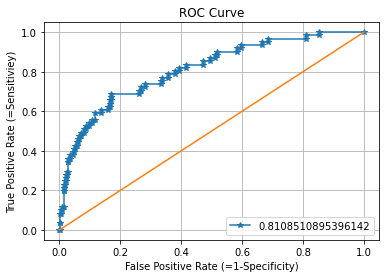

In [11]:
# Disply ROC curve

plt.plot(fpr, tpr, label=area, marker='*')
# plt.plot(fpr, tpr, label=('AUC = ', area))
# plt.plot(fpr, tpr, label='AUC = %0.4f' % area)  # 0.4f=4 digits after decimal
plt.plot([0, 1], [0, 1])  # Display straight line
plt.grid()
plt.xlabel('False Positive Rate (=1-Specificity)')
plt.ylabel('True Positive Rate (=Sensitiviey)')
plt.title('ROC Curve')
plt.legend(loc="lower right")

- `plt.plot(fpr, tpr, label=area, marker='*')`: Plots the ROC curve using the false positive rate (fpr) on the x-axis and the true positive rate (tpr) on the y-axis.
    - `label=area`: It labels the curve with the AUC value calculated earlier. 
    - `marker='*'`: This parameter specifies that the points on the curve should be marked with asterisks
- `plt.plot([0, 1], [0, 1])`: This line adds a straight line to the plot. This straight line represents the ROC curve of a random classifier with no discriminatory power.
- In a ROC curve, a diagonal line from the bottom-left corner to the top-right corner (the line with slope 45 degrees) represents a random classifier, and a good model should be above this line.
- `plt.grid()`: This command adds a grid to the plot.
- `plt.xlabel('False Positive Rate (=1-Specificity)')`: This sets the label for the x-axis.
- `plt.ylabel('True Positive Rate (=Sensitivity)')`: This sets the label for the y-axis.
- `plt.title('ROC Curve')`: This line sets the title of the plot to "ROC Curve."
- `plt.legend(loc="lower right")`: This command adds a legend to the plot. 
    - `loc="lower right"` specifies that the legend should be placed in the lower-right corner of the plot.

### 7. What is the optimal decision threshold (probability) that maximizes (TPR-FPR)?

In [12]:
# Obtain the optimal decision threshold 

best_thresh = threshold[np.argmax(tpr - fpr)]
best_thresh
 # np.argmax: Returns index of maximum value
 # threshold(index): Returns the threshold value corresponding to the index

0.07657562495328728

- `np.argmax(tpr - fpr)`: Calculates the index of the threshold that maximizes the difference between the true positive rate (TPR) and the false positive rate (FPR). The np.argmax() function then finds the index where this difference is maximized.
- `threshold[np.argmax(tpr - fpr)]`: After finding the index of the best threshold, this part retrieves the actual threshold value from the threshold array at that index.

- The optimal threshold that maximizes (TPR-FPR) is much lower than the default 50%.

In [13]:
print(max(tpr - fpr))  # maximum of (TPR-FPR)
np.argmax(tpr - fpr)  # Index of maximum of (TPR-FPR)

0.5189914206307649


64

### 8. Report model accuracy, Confusion matrix, Precision, Recall, and F1 score on test data using the optimal threshold. Discuss differences in results based on the two thresholds (default vs. optimal).

In [14]:
# Predict y using the optimal threshold and obtain scores
 # Set predicted y=1 if predicted probability exceeds the optimal threshold

pred1 = (prob >= best_thresh).astype('int')
pred1[0:5]  # first 5 values
 # pred1=1 if prob>=best_thresh, 0 otherwise
 # astype('int'): convert Boolean to integer

array([0, 0, 1, 0, 1])

- `pred1 = (prob >= best_thresh).astype('int')`: Creates a new binary prediction array pred1 by comparing the predicted probabilities in prob with the best_thresh value.
    - `(prob >= best_thresh)`: Creates a boolean mask by comparing each element in the prob array with the best_thresh. For each element, it will be True if the probability is greater than or equal to the best_thresh, and False otherwise.
    - `astype('int')`: After creating the boolean mask, this part converts it to integers. True becomes 1, and False becomes 0, resulting in a binary prediction array.
- `pred1[0:5]`: This line displays the first five elements of the pred1 array.

In [15]:
# Obtain confusion matrix

metrics.confusion_matrix(ytest, pred1)

array([[676, 138],
       [ 19,  42]], dtype=int64)

|          | Predicted 0   | Predicted 1 |
|----------|:-------------:|------------:|
| Actual 0 |       TN      |      FP     |
| Actual 1 |       FN      |      TP     |

- The model predicts many samples as positive classes.
- As a result, TP and FP are much higher even if TN and FN are lower than before.

In [16]:
# Obtain accuracy, precision, recall, F1

print('Accuracy',  metrics.accuracy_score(ytest, pred1))
print('Precision', metrics.precision_score(ytest, pred1))
print('Recall',    metrics.recall_score(ytest, pred1))
print('F1 Score',  metrics.f1_score(ytest, pred1))

Accuracy 0.8205714285714286
Precision 0.23333333333333334
Recall 0.6885245901639344
F1 Score 0.3485477178423237


- Recall is significantly higher even if Prcision is lower than before.
- As a result, F1 is much higher than before.
- Overall accuracy rate declined.

### 9. Run the following logit model on training data. Draw ROC curve with AUC on test data from M1 and M2.
- **(M2) Buy = β0 + β1 Male + β2 Buyamt + β3 Freq + β4 Lastbuy + β5 Firstbuy + e**

In [17]:
# Define x for M2. 

x2=df[['male', 'buyamt', 'freq', 'lastbuy', 'firstbuy']]

In [18]:
# Divide data into training and test data. Run logistic regression training data.

xtrain2, xtest2, ytrain, ytest=train_test_split(x2, y)
m2 = LogisticRegression(max_iter=300).fit(xtrain2, ytrain)

In [19]:
# Obtain predictions for positive class, fpr, tpr, decisin threshold, AUC

prob2 = m2.predict_proba(xtest2)[:,1]  # all rows and 2nd column
 # column 1,2 of prob: probability of negative and positive class
fpr2, tpr2, threshold2 = roc_curve(ytest, prob2)
 # roc_curve takes observed labels with predicted prob and returns fpr,tpr,thresholds for each tpr & fpr
area2 = auc(fpr2, tpr2)
print('Out-of-sample AUC:', area2)  # '%0.4f' %: display 4 digit

Out-of-sample AUC: 0.6720088520845231


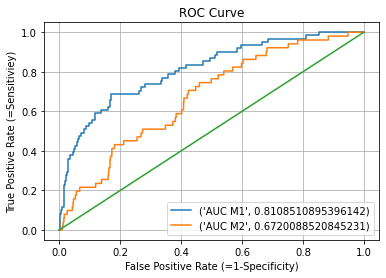

In [20]:
# Disply ROC curve for both M1, M2

plt.plot(fpr, tpr, label=('AUC M1', area))
plt.plot(fpr2, tpr2, label=('AUC M2', area2))
plt.plot([0, 1], [0, 1])  # Display straight line
plt.grid()
plt.xlabel('False Positive Rate (=1-Specificity)')
plt.ylabel('True Positive Rate (=Sensitiviey)')
plt.title('ROC Curve')
plt.legend(loc="lower right")

- Model 1 is better: M1 has higher AUC than M2.

Text(0.5, 15.0, 'Predicted')

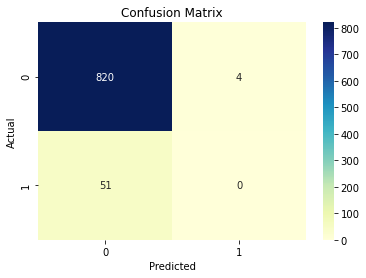

In [21]:
# Confusion matrix heatmap

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(ytest, pred)), annot=True, cmap="YlGnBu", fmt='g')
 # annot: number in cell, cmap: color, fmt: string format
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

- `sns.heatmap(pd.DataFrame(metrics.confusion_matrix(ytest, pred)), annot=True, cmap="YlGnBu", fmt='g')`: This line creates the heatmap using seaborn.
    - `pd.DataFrame(metrics.confusion_matrix(ytest, pred))`: It converts the confusion matrix (which is typically a NumPy array) into a pandas DataFrame for better visualization.
    - `annot=True:` This parameter specifies that the values should be annotated (displayed) within each cell of the heatmap, showing the actual counts of true positives, true negatives, false positives, and false negatives.
    - `cmap="YlGnBu"`: This parameter sets the color map for the heatmap. In this case, it uses the "YlGnBu" color map, which goes from yellow (low values) to green and blue (high values), providing a visual representation of the count of instances in each cell.
    - `fmt='g'`: This parameter specifies the format for displaying the numbers in each cell. 'g' means to use the default numeric format.
- `plt.title('Confusion Matrix')`: This line sets the title of the heatmap to "Confusion Matrix."
- `plt.ylabel('Actual')`: This line labels the y-axis of the heatmap with "Actual," indicating the actual class labels.
- `plt.xlabel('Predicted')`: This line labels the x-axis of the heatmap with "Predicted," indicating the predicted class labels

In [22]:
# max vs. np.argmax

a = [1,2,3,4,5]
print(max(a))  # max value
np.argmax(a)  # index(position) of max value

5


4

- `(max(a))`: finds the maximum value in the list a.
- `np.argmax(a)`: finds the index of the maximum value in the array a.

In [23]:
b = [[1,2,3,4,5]]  # Notice two bracketss: 5 elements are combined as one

print(max(b))  # max value is the whole list
np.argmax(b)  # index(position) of max value is the same

[1, 2, 3, 4, 5]


4

In [24]:
c = np.matrix([[1,2,10], [3,4,20], [5,6,30]])  # 2-D materix
c

matrix([[ 1,  2, 10],
        [ 3,  4, 20],
        [ 5,  6, 30]])

- `np.matrix()`: Creates a 3x3 matrix using NumPy.

In [25]:
print(np.max(c))  # max value is a single number
np.argmax(c)  # index(position) of max value

30


8